In [19]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize.punkt import PunktSentenceTokenizer
from gensim.models import word2vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# Data cleaning for the words in text
def review_words(review):
    lmtzr = WordNetLemmatizer()
    snowball = SnowballStemmer('english')
    review_text = BeautifulSoup(review).get_text()
    #print(review_text)
    regex = re.compile('[^a-zA-Z]')
    letters = regex.sub(' ',review_text)
    #print(letters)
    words = letters.lower().split()
    #print(words)
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in words if not w in stops]
    lemmatized_words = [lmtzr.lemmatize(w) for w in meaningful_words]
    #print(lemmatized_words)
    stemmed_words = [snowball.stem(w) for w in lemmatized_words]
    #output_words = ' '.join(stemmed_words)
    
    #return output_words
    return stemmed_words


In [3]:
#Divide reviews into sentences
def review_sentence(review,tokenizer):
    raw_sentences = tokenizer.tokenize(review.strip())
    #print(len(raw_sentences))
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(review_words(raw_sentence))
    return sentences

In [4]:
#Extract features from reviews 
def review_vector(file):
    tokenizer = PunktSentenceTokenizer()
    data = pd.read_csv(file, header = 0, delimiter = '\t', quoting =3)
    raw_review = data['review']
    size = len(data['review'])
    review_all = []
    for i in range(size):
        review_clean = review_sentence(raw_review[i],tokenizer)
        review_all += review_clean
        if i%5000 == 0:
            print('review set finished:{}'.format(i))
            
    
    num_features = 500
    min_word_count = 50
    num_workers = 6
    context = 10
    downsampling = 1e-3
    
    model = word2vec.Word2Vec(review_all, size = num_features, min_count = min_word_count,workers = num_workers, window = context, sample = downsampling)
    model.init_sims(replace=True)
    model_name = 'sentiment_vector'
    model.save(model_name)    
    
    return review_all

In [5]:
#Read data from unlabeledTrainData
review_all = review_vector('unlabeledTrainData.tsv')
data = word2vec.Word2Vec.load('sentiment_vector')

df = pd.DataFrame(review_all)
df.to_csv('words.csv',index=False,header=False)
print('review file finished')

/Users/zhaomingchuan/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/zhaomingchuan/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


review set finished:0


/Users/zhaomingchuan/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You shouldprobably open this file and pass the filehandle intoBeautiful Soup.
  'Beautiful Soup.' % markup)
/Users/zhaomingchuan/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/zhaomingchuan/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful So

review set finished:5000
review set finished:10000
review set finished:15000
review set finished:20000


/Users/zhaomingchuan/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.msnbc.msn.com/id/4972055/site/newsweek/"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


review set finished:25000
review set finished:30000
review set finished:35000


/Users/zhaomingchuan/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.youtube.com/watch?v=a0KSqelmgN8"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


review set finished:40000
review set finished:45000


/Users/zhaomingchuan/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://jake-weird.blogspot.com/2007/08/beneath.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


review file finished


In [6]:
#Feed word2vec model and extract features
model_new = word2vec.Word2Vec.load('sentiment_vector')
matrix = model_new.wv.syn0
print(matrix.shape)

(8360, 500)


In [7]:
print(len(model_new.wv.vocab))

8360


In [8]:
model_new.doesnt_match('man woman watch school money'.split())

'watch'

In [9]:
model_new.most_similar('money')

[('dollar', 0.6336034536361694),
 ('buck', 0.6197190880775452),
 ('fee', 0.5919243693351746),
 ('fund', 0.5842739343643188),
 ('cash', 0.5593440532684326),
 ('debt', 0.5519190430641174),
 ('salari', 0.5428949594497681),
 ('ticket', 0.5344527959823608),
 ('profit', 0.5288163423538208),
 ('tax', 0.5062886476516724)]

In [10]:
vocab = model_new.wv.vocab.keys()
vocab = list(vocab)
print(model_new.wv.index2word)

['movi', 'film', 'one', 'like', 'time', 'make', 'good', 'charact', 'see', 'get', 'watch', 'stori', 'even', 'would', 'go', 'realli', 'scene', 'well', 'bad', 'look', 'much', 'end', 'show', 'great', 'peopl', 'also', 'first', 'love', 'way', 'play', 'act', 'think', 'thing', 'made', 'could', 'life', 'seem', 'know', 'say', 'plot', 'two', 'work', 'take', 'come', 'actor', 'mani', 'year', 'want', 'never', 'tri', 'seen', 'littl', 'best', 'ever', 'better', 'man', 'give', 'perform', 'find', 'part', 'still', 'feel', 'someth', 'interest', 'back', 'director', 'actual', 'lot', 'real', 'use', 'woman', 'guy', 'cast', 'funni', 'though', 'anoth', 'old', 'new', 'role', 'noth', 'star', 'u', 'start', 'enjoy', 'action', 'set', 'girl', 'point', 'direct', 'everi', 'world', 'day', 'music', 'fact', 'horror', 'kill', 'comedi', 'turn', 'origin', 'thought', 'quit', 'minut', 'happen', 'effect', 'believ', 'pretti', 'young', 'long', 'around', 'right', 'enough', 'howev', 'friend', 'wonder', 'line', 'got', 'fan', 'bit', '

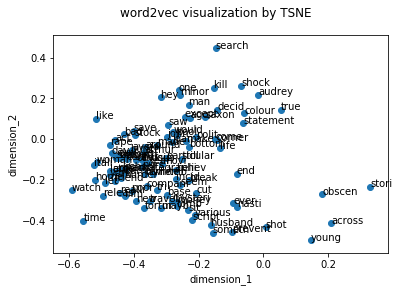

In [21]:
import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#Plot Words
tsne = TSNE(n_components = 2)
#pca = PCA(n_components = 2)
k = tsne.fit_transform(matrix[:,:])
#k = pca.fit_transform(matrix[:,:])

fig,ax = plt.subplots()
fig.suptitle('word2vec visualization by TSNE')
plt.xlabel('dimension_1')
plt.ylabel('dimension_2')
ax.scatter(k[:100,0],k[:100,1])

for i,label in enumerate(vocab[:100]):
    plt.annotate(label,(k[i,0],k[i,1]))

plt.show()

In [11]:
#From review features from word features
def feature_sent(sentence, model, num_features):
    featureVec = np.zeros((num_features,),dtype = 'float32')
    num_words = 1
    word_set = set(model.wv.index2word)
    for word in sentence:
        if word in word_set:
            featureVec = np.add(featureVec,model[word])
            num_words += 1
    featureVec = np.divide(featureVec,num_words)
    return featureVec
            
        
def feature_bag(data, model, num_features):
    feature_para = []
    for sentence in data:
        features = feature_sent(sentence, model, num_features)
        feature_para.append(features)
    return feature_para

In [13]:
#Read data from labeledTrainData
data = pd.read_csv('labeledTrainData.tsv',header = 0, delimiter = '\t', quoting =3)
review_data = []
for review in data['review']:
    train_data = review_words(review)
    review_data.append(train_data)
featureVec = feature_bag(review_data, model_new, 500)
print(np.array(train_data).shape)
print(np.array(featureVec).shape)

/Users/zhaomingchuan/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/zhaomingchuan/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


(78,)
(25000, 500)


In [14]:
#Read labels from labeledTrainData
sentiment_p = pd.read_csv('labeledTrainData.tsv',header = 0, delimiter = '\t', quoting =3)
sentiment = sentiment_p['sentiment']
print(sentiment.shape)

(25000,)


In [20]:
#Train classifier
#forest = RandomForestClassifier(n_estimators = 100)
#forest = forest.fit(featureVec,sentiment)
#svc = SVC(kernel = 'linear')
#svc.fit(featureVec,sentiment)
bayes = GaussianNB()
bayes = bayes.fit(featureVec,sentiment)

In [22]:
#Read test data and make predictions
data_test = pd.read_csv('testData.tsv',header = 0, delimiter = '\t', quoting =3)
review_test = []
for review in data_test['review']:
    test_data = review_words(review)
    review_test.append(test_data)
testVec = feature_bag(review_test, model_new, 500)
result = bayes.predict(testVec)
#result = x_gboost.predict(test)
output = pd.DataFrame({'id':data_test['id'],'sentiment':result})
output.to_csv('Bag_of_Words_model_x.csv', index=False,quoting=3)

/Users/zhaomingchuan/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/zhaomingchuan/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))
